# Boosting
Boosting 是另一種主要的 Ensemble 技術，它與 Bagging 有本質的不同。Boosting 的目標是創建一系列弱學習器，逐步改進它們。在 Boosting 中，每個後續的模型都著重於前一模型錯誤預測的樣本，從而使學習器專注於難以預測的案例。這種方法通過加權多個弱學習器的預測來形成最終預測。典型的 Boosting 方法包括 AdaBoost 和 Gradient Boosting，Boosting在處理偏差和方差之間的權衡方面表現出色。


1. adaBoost
2. catBoost
3. XGBoost
4. LightGBM

# AdaBoost - Classifier 
adaboost: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

base estimator is DecisionTreeClassifier initialized with max_depth=1.

In [106]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

clf.fit(X, y)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

# Printing classification report for more detailed metrics
print(classification_report(y_test, y_pred))

(1000, 4)
number of correct sample: 197.0
accuracy: 0.985
con_matrix: [[ 97   2]
 [  1 100]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        99
           1       0.98      0.99      0.99       101

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



c:\Users\sunny_weng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### adaBoost classifier w/ digits dataset by DecisionTreeClassifier

In [60]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

np.random.seed(1)

digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

ensemble_size = 2000
ensemble = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              algorithm="SAMME",
                              n_estimators=ensemble_size)

ensemble.fit(train_x, train_y)

ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)


print('Boosting: {}'.format(ensemble_acc))

Boosting: 0.8451178451178452


# AdaBoost - Regressor

In [61]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
import numpy as np

diabetes = load_diabetes()

train_size = 400
train_x, train_y = diabetes.data[:train_size], diabetes.target[:train_size]
test_x, test_y = diabetes.data[train_size:], diabetes.target[train_size:]

np.random.seed(1)


ensemble_size = 2000
# n_estimators = DecisionTreeRegressor` initialized with `max_depth=3 by default setting
ensemble = AdaBoostRegressor(n_estimators=ensemble_size)


ensemble.fit(train_x, train_y)
predictions = ensemble.predict(test_x)

r2 = metrics.r2_score(test_y, predictions)
mse = metrics.mean_squared_error(test_y, predictions)

print('Gradient Boosting:')
print('R-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

Gradient Boosting:
R-squared: 0.5565555998761788
MSE: 2454.996938242642


### adaBoost regressor w/ digits dataset by DecisionTreeRegressor

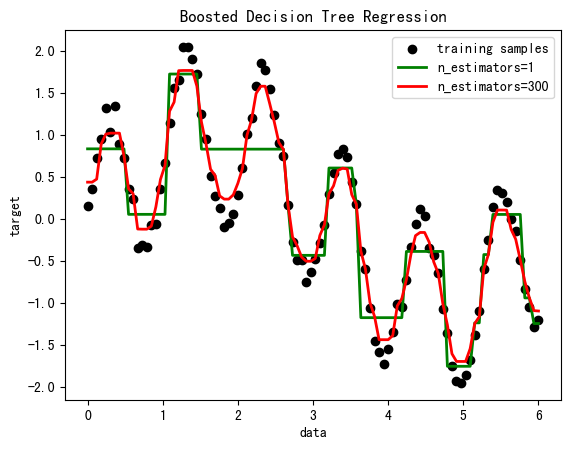

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# create dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]

# np.newaxis 
# None
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# train regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# plot
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# XGBOOST  
XGBOOST theory ref: https://towardsdatascience.com/xgboost-python-example-42777d01001e  


install XGBOOST: pip install xgboost

In [63]:
!pip install xgboost -q

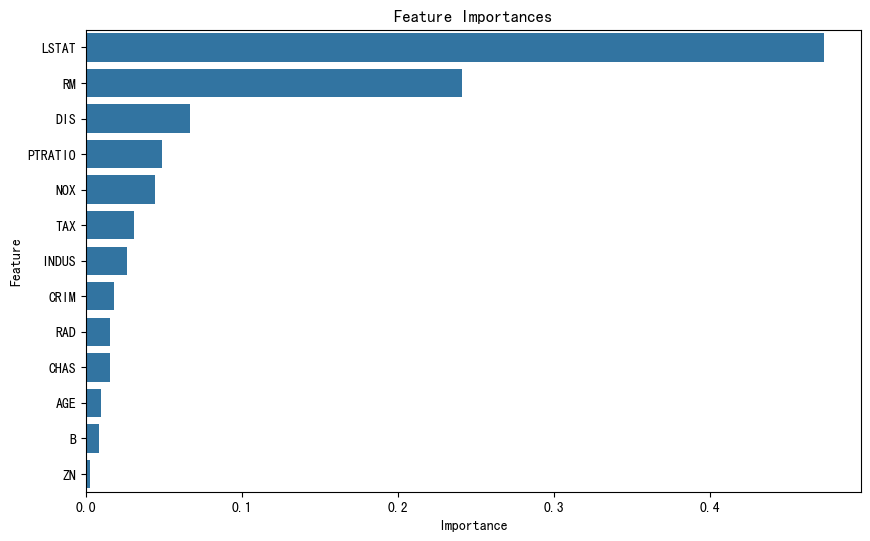

r2: 0.9064673260556826
mse: 7.302888525252694


In [70]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
boston = fetch_openml(name='boston', version=1)

# 转换数据集
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# 将类别型列转换为数值型
X['CHAS'] = X['CHAS'].astype(float)
X['RAD'] = X['RAD'].astype(float)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 初始化回归器
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

# 训练模型
regressor.fit(X_train, y_train)

# 获取特征重要性
feature_importances = regressor.feature_importances_
features = X.columns

# 创建数据框用于绘图
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 预测
y_pred = regressor.predict(X_test)

# 计算误差
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('r2: {}'.format(r2))
print('mse: {}'.format(mse))
